In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df1 = df.drop(columns = ["RowNumber","CustomerId","Surname"])
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


# **Exploratory Data Analysis from here:**


1.   Correlation Matrix between different numerical features
2.   Bar plot between target label and categorical data
1.   Bar plot between different features
2.   Bar plot between Mean of Numerical Features and Target Label







<Axes: >

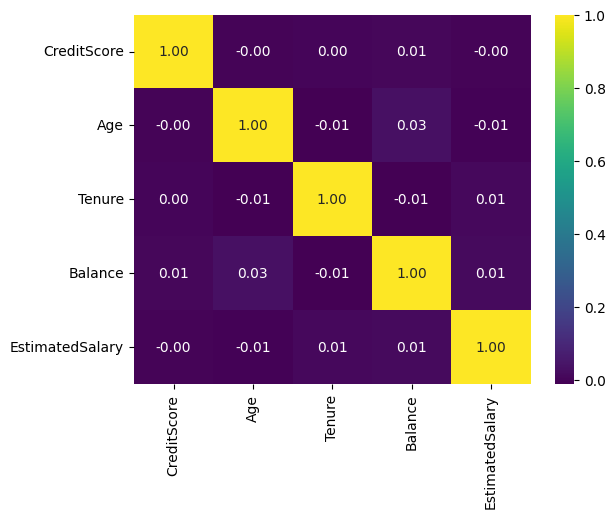

In [ ]:
cmap = df1.drop(columns=["NumOfProducts","HasCrCard","IsActiveMember","Exited"]).corr(numeric_only=True)
sns.heatmap(cmap,annot=True, fmt=".2f", cmap='viridis')

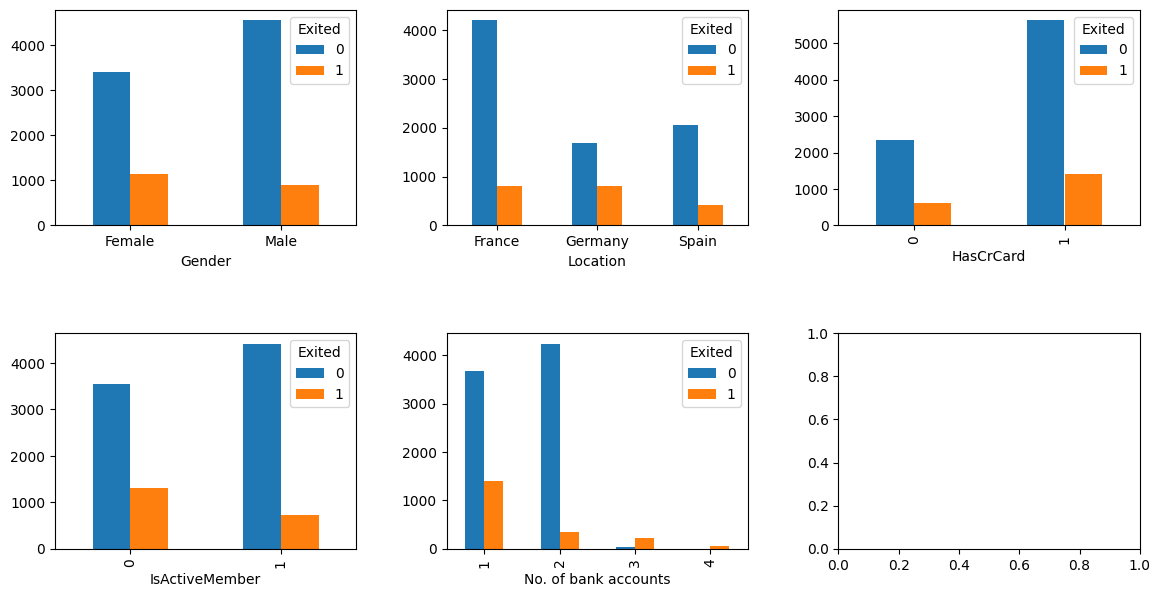

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(14,7))
pd.crosstab(df1['Gender'],df['Exited']).plot(kind='bar',ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=0)
pd.crosstab(df1['Geography'],df['Exited']).plot(kind='bar',ax=axes[0,1])
axes[0,1].set_xlabel("Location")
axes[0,1].tick_params(axis='x', rotation=0)
pd.crosstab(df1['HasCrCard'],df['Exited']).plot(kind='bar',ax=axes[0,2])
pd.crosstab(df1['IsActiveMember'],df['Exited']).plot(kind='bar',ax=axes[1,0])
pd.crosstab(df1['NumOfProducts'],df['Exited']).plot(kind='bar',ax=axes[1,1])
axes[1,1].set_xlabel("No. of bank accounts")
plt.subplots_adjust(hspace=0.5, wspace=0.3)

Text(0.5, 0, 'No. of accounts')

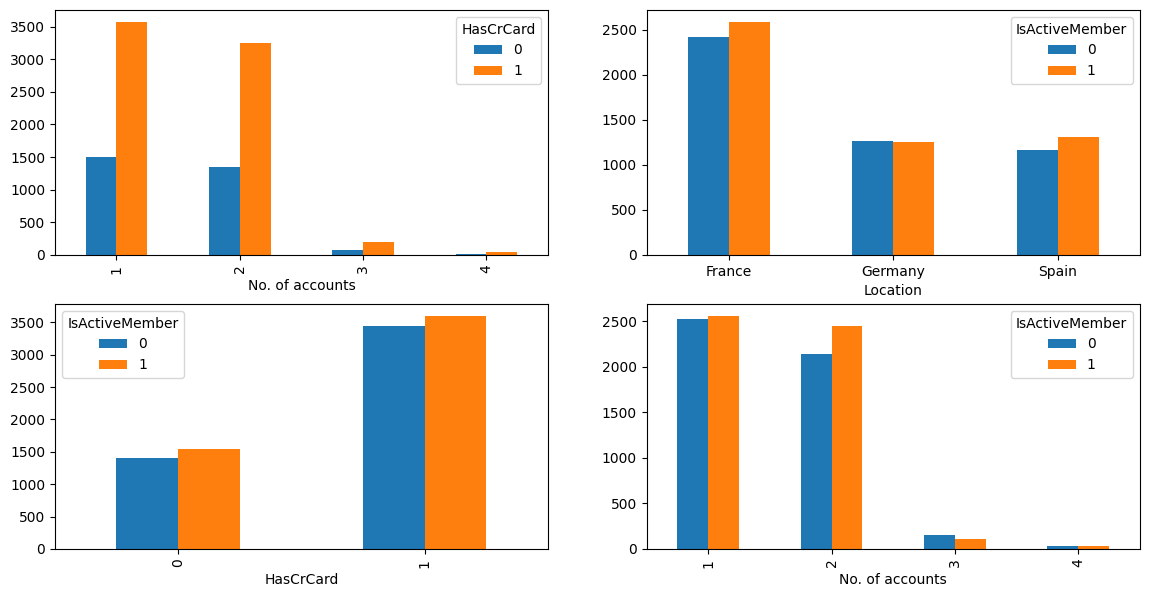

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(14,7))
pd.crosstab(df1['NumOfProducts'],df['HasCrCard']).plot(kind='bar',ax=axes[0,0])
axes[0,0].set_xlabel("No. of accounts")
pd.crosstab(df1['Geography'],df['IsActiveMember']).plot(kind='bar',ax = axes[0,1])
axes[0,1].set_xlabel("Location")
axes[0,1].tick_params('x',rotation=0)
pd.crosstab(df1['HasCrCard'],df['IsActiveMember']).plot(kind='bar',ax=axes[1,0])
pd.crosstab(df1['NumOfProducts'],df['IsActiveMember']).plot(kind='bar',ax=axes[1,1])
axes[1,1].set_xlabel("No. of accounts")


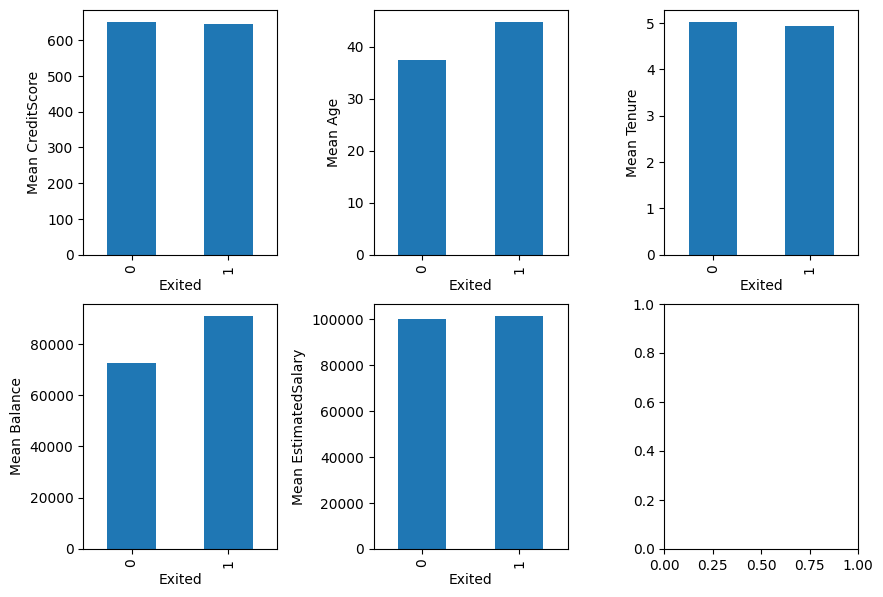

In [ ]:
x = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
fig,axes = plt.subplots(2,3,figsize=(10,7))
axes = axes.flatten()
for i in range(len(x)):
  df1.groupby("Exited")[x[i]].mean().plot(kind='bar',ax=axes[i])
  axes[i].set_ylabel(f"Mean {x[i]}")
plt.subplots_adjust(wspace=0.5)

# Feature Scaling and Data Pre-Processing

In [5]:
# Implementing Min-Max Scaler
def minmax(df):
  cf = (df-df.mean())/(df.max()-df.min())
  return cf

In [6]:
x = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
for i in x :
  df1.loc[:,i] = minmax(df1.loc[:,i])

In [8]:
df2 = pd.get_dummies(df1,columns=["Geography","Gender"])
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.063058,0.041597,-0.30128,-0.304848,1,1,1,0.006294,1,True,False,False,True,False
1,-0.085058,0.028084,-0.40128,0.029183,1,0,1,0.062268,0,False,False,True,True,False
2,-0.297058,0.041597,0.29872,0.331509,3,1,0,0.069213,1,True,False,False,True,False
3,0.096942,0.001057,-0.40128,-0.304848,2,0,0,-0.031321,0,True,False,False,True,False
4,0.398942,0.055111,-0.30128,0.195398,1,1,1,-0.105041,0,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.240942,0.001057,-0.00128,-0.304848,2,1,0,-0.019100,0,True,False,False,False,True
9996,-0.269058,-0.052997,0.49872,-0.076191,1,1,1,0.008048,0,True,False,False,False,True
9997,0.116942,-0.039484,0.19872,-0.304848,1,0,1,-0.290051,1,True,False,False,True,False
9998,0.242942,0.041597,-0.20128,-0.005622,2,1,0,-0.036012,1,False,True,False,False,True


# Training the dataset Using an Artificial Neural Network (ANN)

In [56]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

We use an Artificial Neural Network with 13 Input Features followed by:


1.   Hidden Layer 1 : 32 Neurons
2.   Hidden Layer 2 : 100 Neurons
3.   Hidden Layer 3 : 100 Neurons
4.   Outputer Layer : 1 Neuron

The Hidden Layers have Rectified Linear Unit (ReLu) as Activation Function and Output Neuron has Sigmoid Activation Function.





In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=(df2.columns.size-1,),activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = [tf.losses.binary_crossentropy],
    metrics = ['accuracy']
)

In [29]:
trainX , testX , trainY , testY = train_test_split(df2.drop(columns = 'Exited'),df2['Exited'],train_size=0.8,shuffle=True)

In [30]:
print(f"Class Imbalance is by an order of {trainY[trainY==1].size/trainY[trainY==0].size}")

Class Imbalance is by an order of 0.25568984460838173


# **We will perform a stratified train test split to address the imbalance in the dataset**

In [32]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(df2.drop(columns = 'Exited'),df2['Exited'],train_size=0.8,shuffle=True,stratify=df2["Exited"])

**Class Weight** is *Inversely proportional* to **Frequency** of each class

In [33]:
class_weight = class_weight.compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(Ytrain),
    y = Ytrain
)

class_weight_dict = {0: class_weight[0], 1: class_weight[1]}

In [34]:
class_weight_dict

{0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}

In [35]:
model.fit(Xtrain,Ytrain,class_weight=class_weight_dict,validation_split=0.2,epochs=50,batch_size=10)

Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6545 - loss: 0.6371 - val_accuracy: 0.7700 - val_loss: 0.5030
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7437 - loss: 0.5366 - val_accuracy: 0.7600 - val_loss: 0.5121
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7636 - loss: 0.5022 - val_accuracy: 0.7581 - val_loss: 0.5036
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7723 - loss: 0.4795 - val_accuracy: 0.7387 - val_loss: 0.5394
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7814 - loss: 0.4748 - val_accuracy: 0.7844 - val_loss: 0.4758
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7912 - loss: 0.4647 - val_accuracy: 0.8019 - val_loss: 0.4550
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7959 - loss: 0.4586 - val_accuracy: 0.8081 - val_loss: 0.4354
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7947 - loss: 0.4553 - val_accuracy: 0.

In [36]:
pred = np.array([1 if i>0.5 else 0 for i in model.predict(Xtest)])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [37]:
print(classification_report(Ytest,pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



Text(0.5, 23.52222222222222, 'Truth Values')

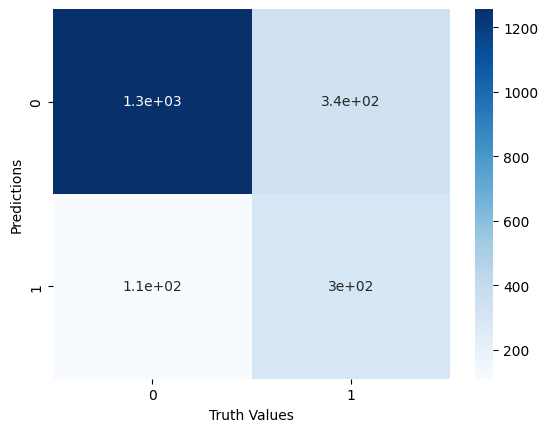

In [38]:
cm = confusion_matrix(Ytest,pred)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.ylabel("Predictions")
plt.xlabel("Truth Values")

# We can clearly see that the model struggles to predict the minority class , hence we try to populate the minority class using SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm = SMOTE(random_state=36)
X_new , Y_new = sm.fit_resample(df2.drop(columns = 'Exited'),df2['Exited'])

In [41]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X_new , Y_new , train_size = 0.8 , shuffle = True)

In [42]:
print(f"The ratio of both the classes are {Ytrain[Ytrain==0].size/Ytrain[Ytrain==1].size}")

The ratio of both the classes are 0.9943644333124608


**As we can see , we have achieved a reasonable balance between the two Classes**

In [43]:
model.fit(Xtrain,Ytrain,validation_split=0.2,epochs=100,batch_size=32)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8337 - loss: 0.3852 - val_accuracy: 0.8426 - val_loss: 0.3674
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.3648 - val_accuracy: 0.8391 - val_loss: 0.3617
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8439 - loss: 0.3443 - val_accuracy: 0.8465 - val_loss: 0.3538
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8578 - loss: 0.3269 - val_accuracy: 0.8442 - val_loss: 0.3554
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8598 - loss: 0.3160 - val_accuracy: 0.8430 - val_loss: 0.3475
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8503 - loss: 0.3218 - val_accuracy: 0.8458 - val_loss: 0.3500
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.3085 - val_accuracy: 0.8430 - val_loss: 0.3544
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8658 - loss: 0.3028 - val_accu

In [53]:
pred = np.array([1 if i>0.6 else 0 for i in model.predict(Xtest)])
print(classification_report(Ytest,pred))

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1611
           1       0.86      0.87      0.87      1575

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



Text(0.5, 23.52222222222222, 'Truth Values')

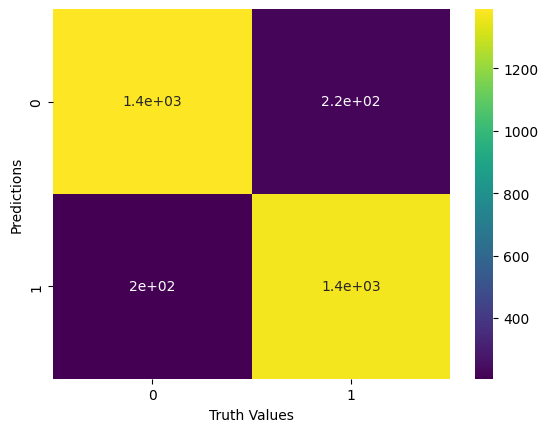

In [54]:
cm = confusion_matrix(Ytest,pred)
sns.heatmap(cm,annot=True,cmap='viridis')
plt.ylabel("Predictions")
plt.xlabel("Truth Values")

In [57]:
roc_auc = roc_auc_score(Ytest, pred)
print(f"ROC AUC Score: {roc_auc}")


ROC AUC Score: 0.8663296976146138
